## Homework 9, Exercise 1

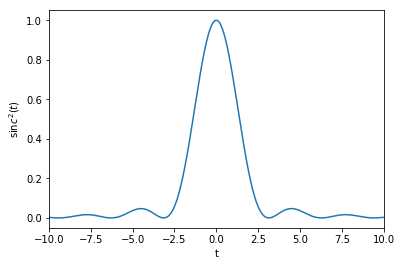

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def sinc_sq(t):
    return (np.sin(t)/t)**2

def tri(x):
    return max(1-np.abs(x),0)

def ft_sinc_sq(omega):
    return np.pi*tri(omega/2)

tmax = 100
dt = 0.001
t = np.arange(-tmax,tmax,dt)
f = sinc_sq(t)

plt.plot(t, f)
plt.xlim(-10,10)
plt.xlabel("t")
plt.ylabel(r"$\sinc^2(t)$")
plt.show()

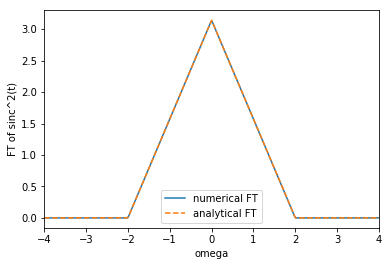

In [9]:
from scipy.fftpack import fft, fftshift, ifftshift

N = len(t)
domega = 2*np.pi/dt/N
omega_max = domega*N/2
omega = np.arange(-omega_max,omega_max,domega)

ft_numerical = fftshift( fft( ifftshift(f) ) )
ft_numerical = np.real(dt*ft_numerical)

omega_plot = np.arange(-5,5,0.001)
    
analytical_data = []
for i in range(len(omega_plot)):
    analytical_data = np.append(analytical_data, ft_sinc_sq(omega_plot[i]))

plt.plot(omega, ft_numerical, label = 'numerical FT')
plt.plot(omega_plot, analytical_data, "--", label = 'analytical FT')
plt.xlim(-4,4)
plt.xlabel("omega")
plt.legend(loc = 'lower center')
plt.ylabel("FT of sinc^2(t)")
plt.show()

## Homework 9, Exercise 2

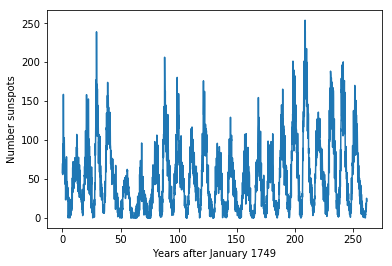

Estimate for periodicity based on graph: ~11 years (about 4.5 periods every 50 years)


In [13]:
# part (i)

sunspots = np.genfromtxt('sunspots.txt')

plt.plot(sunspots[:,0]/12,sunspots[:,1])
plt.xlabel("Years after January 1749")
plt.ylabel('Number sunspots')
plt.show()

print("Estimate for periodicity based on graph: ~11 years (about 4.5 periods every 50 years)")

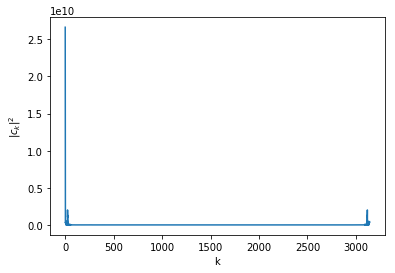

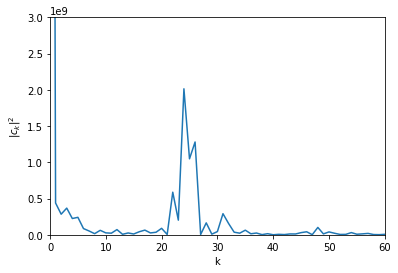

In [22]:
# part (ii) Fourier transform

c = fft(sunspots[:,1])
power_spec = np.abs(c)**2

plt.plot(power_spec)
plt.xlabel("k")
plt.ylabel(r"$|c_k|^2$")
plt.show()

# zoom in to see smaller peak
plt.plot(power_spec)
plt.xlim(0,60)
plt.ylim(0,3e9)
plt.xlabel("k")
plt.ylabel(r"$|c_k|^2$")
plt.show()

In [25]:
# part (iii) find peak and determine length of the sunspot cycle

# location of maximum approximately between k = 20 and 30
power_spec_part = power_spec[20:30]
k_max = np.argmax(power_spec_part)
      
# in the SciPy convention, the corresponding omega_k = k_max/T
# the corresponding period t = 1/omega_k = T/k_max
T=len(sunspots)
period=T/kX
periodYears=period/12
print("period (months) =",period)
print("period (years) =",periodYears)

period (months) = 130.95833333333334
period (years) = 10.913194444444445


## Homework 9, Exercise 3

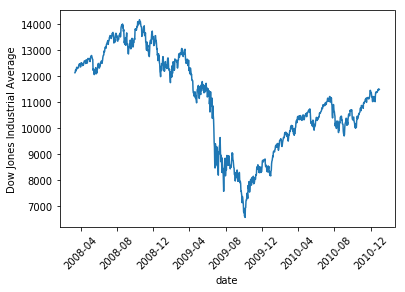

In [13]:
# part (i) read in and plot data

import datetime

dow = np.genfromtxt('dow.txt')

# Getting the correct time axis units (code credit: Alastair)
t = np.arange(0,len(dow),1)
epoch = datetime.datetime(2010,12,31)
date = [None]*len(t)
counter = 1
j = 0
for i in range(len(t)):
    j+= 1
    if counter == 5:
        j+= 1    
    date[i] = epoch - datetime.timedelta(days = j)
date = date[::-1]
    
# plot
plt.plot(date,dow)
plt.xlabel('date')
plt.ylabel('Dow Jones Industrial Average')
plt.xticks(rotation=45)
plt.show()

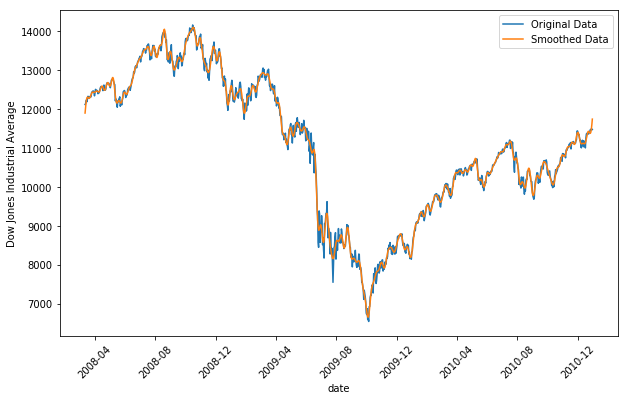

In [14]:
# part (ii) Fourier transform and smoothing
from scipy.fftpack import ifft, fft

fft_dow = fft(dow)

# When using the fft routine on real-valued input data the coefficients are mirrored around the center

# keep 10% of coefficients on either side (or you may choose to keep 10% altogether, i.e. 5% on either side)
fft_smooth90 = fft_dow
length = len(fft_dow)
cutoff = int(length*0.1)
fft_smooth90[cutoff:length-cutoff] = 0

# FFT back
smooth90 = ifft(fft_smooth90)

plt.figure(figsize=(10,6))
plt.plot(date, dow, label='Original Data')
plt.plot(date, np.real(smooth90), label='Smoothed Data')   # np.real() to avoid annoying warning
plt.legend()
plt.xlabel('date')
plt.ylabel('Dow Jones Industrial Average')
plt.xticks(rotation=45)
plt.show()

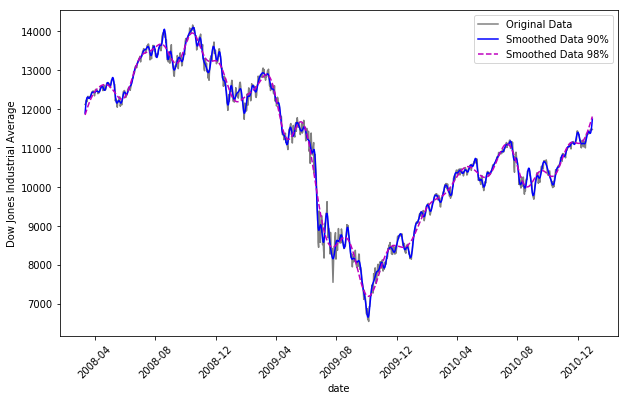

In [15]:
# part (iii) stronger smoothing

# keep 2% of coefficients on either side
fft_smooth98 = fft_dow
cutoff = int(length*0.02)
fft_smooth98[cutoff:length-cutoff] = 0

# FFT back
smooth98 = ifft(fft_smooth98)

plt.figure(figsize=(10,6))
plt.plot(date, dow, label='Original Data', color='grey')
plt.plot(date, np.real(smooth90), label='Smoothed Data 90%', color='blue')
plt.plot(date, np.real(smooth98), '--', label='Smoothed Data 98%', color='m')
plt.legend()
plt.xlabel('date')
plt.ylabel('Dow Jones Industrial Average')
plt.xticks(rotation=45)
plt.show()

The more Fourier coefficients we remove the smoother the data becomes.